In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [89]:
df=pd.read_csv("spam.csv",encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [90]:
df=df[{'v1','v2'}]
df

C:\Users\push1\AppData\Local\Temp\ipykernel_33716\4061938647.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df=df[{'v1','v2'}]


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [91]:
df=df.where((pd.notnull(df)), '')

In [92]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
df.tail(6)

,v1,v2
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


<AxesSubplot:ylabel='v1'>

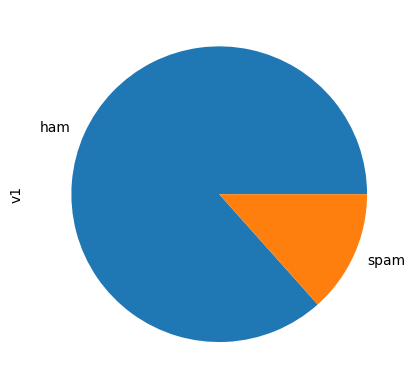

In [94]:
df['v1'].value_counts().plot(kind='pie')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [96]:
df.shape

(5572, 2)

In [97]:
#conversion to binary form
df.loc[df['v1']=='spam','v1']=0
df.loc[df['v1']=='ham','v1']=1

In [98]:
df

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [99]:
x1=df['v2']
y1=df['v1']

In [100]:
x1

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [101]:
y1

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.8,random_state=3)

In [103]:
x_train.shape

(1114,)

In [104]:
x_test.shape

(4458,)

In [105]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [106]:
x_train

2309    I have 2 sleeping bags, 1 blanket and paper an...
3727    The search 4 happiness is 1 of d main sources ...
385                                It took Mr owl 3 licks
2300    Nothin comes to my mind. ÌÏ help me buy hanger...
4857                                                Ok...
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: v2, Length: 1114, dtype: object

In [107]:
print(x_train_features)

  (0, 933)	0.38169343003798417
  (0, 2140)	0.3068986851823308
  (0, 2095)	0.46046052956669653
  (0, 529)	0.46046052956669653
  (0, 464)	0.41687910647850807
  (0, 2575)	0.4028490219712474
  (1, 1708)	0.23659816720475793
  (1, 1901)	0.2553279714810523
  (1, 778)	0.241919438558794
  (1, 3105)	0.19119132397661817
  (1, 1687)	0.20428232263172857
  (1, 280)	0.29184246839191025
  (1, 2977)	0.29184246839191025
  (1, 2632)	0.29184246839191025
  (1, 1779)	0.27568454610539556
  (1, 1390)	0.5836849367838205
  (1, 2470)	0.2642203177983341
  (2, 1686)	0.538775831521014
  (2, 2086)	0.538775831521014
  (2, 1928)	0.4579526213145197
  (2, 2894)	0.4579526213145197
  (3, 1413)	0.33361730229303815
  (3, 1648)	0.33361730229303815
  (3, 3001)	0.19105862345946986
  (3, 1732)	0.23223351021508729
  :	:
  (1109, 889)	0.321090158511031
  (1110, 398)	0.6191306903052041
  (1110, 3148)	0.6191306903052041
  (1110, 742)	0.48306767294490216
  (1111, 875)	0.3961142858659216
  (1111, 844)	0.4219157937260474
  (1111, 2276

In [108]:
x_train_features.shape

(1114, 3265)

In [109]:
print(x_test_features)

  (0, 2561)	0.5309065221478986
  (0, 1830)	0.5212944095422954
  (0, 624)	0.6681245417740411
  (1, 3125)	0.3242213948570737
  (1, 2816)	0.2147708603363574
  (1, 2806)	0.34322407083486745
  (1, 2271)	0.34322407083486745
  (1, 1420)	0.5185016331144211
  (1, 1226)	0.19943558042421902
  (1, 193)	0.3107387816849359
  (1, 15)	0.34322407083486745
  (1, 1)	0.30028085443703334
  (2, 2863)	0.3385170699485921
  (2, 2839)	0.34854469719880554
  (2, 1726)	0.44450978750752074
  (2, 1247)	0.579376441477029
  (2, 1246)	0.4802673997675113
  (3, 3064)	0.3853243148326607
  (3, 2883)	0.30618721375455116
  (3, 2280)	0.3853243148326607
  (3, 2126)	0.312384373566941
  (3, 2029)	0.36399074961003586
  (3, 1353)	0.2868393576162467
  (3, 1344)	0.3853243148326607
  (3, 670)	0.3853243148326607
  :	:
  (4455, 2043)	0.39740409607849586
  (4455, 1781)	0.4045505833089297
  (4455, 944)	0.4123786743754937
  (4455, 334)	0.5681944333676024
  (4456, 3177)	0.26659243065801397
  (4456, 2499)	0.33528495170537476
  (4456, 2245)	

In [110]:
x_test_features.shape

(4458, 3265)

# LOGISTIC REGRESSION

In [111]:
model=LogisticRegression()

In [112]:
model.fit(x_train_features,y_train)

LogisticRegression()

In [113]:
pred_on_training_data=model.predict(x_train_features)
acc_on_training_data=accuracy_score(y_train,pred_on_training_data)

In [114]:
acc_on_training_data

0.9210053859964094

In [115]:
pred_on_test_data=model.predict(x_test_features)
acc_on_test_data=accuracy_score(y_test,pred_on_test_data)

In [116]:
acc_on_test_data

0.9062359802602064

# SPAM DETECTOR

In [118]:
input_mail=["Pushpendra, we have extended the applications for the Internshala Student Partner! You have under 36 hours left to use this golden opportunity to LEARN job-essential skills while EARNING massive cash rewards worth INR 7 Lacs."]
input_mail_features=feature_extraction.transform(input_mail)
pred=model.predict(input_mail_features)
pred

array([1])